In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.constants.paths import REPLAY_PICKLE_FOLDER
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.classes.action_tests import ActionTest
from triple_agent.classes.outcomes import WinType
from triple_agent.classes.missions import Missions
from triple_agent.reports.specific.mission_choices import mission_choices
from triple_agent.reports.specific.mission_completes import mission_completion, mission_completion_query, final_mission_completion_query, average_hard_tell_count, num_visits_to_finish_inspects
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.specific.fingerprints import attempted_fingerprint_sources
from triple_agent.reports.specific.banana_breads import all_banana_bread_percentages, first_banana_bread_percentages, banana_split
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.bug import bug_attempt_timings, bug_success_rate
from triple_agent.reports.specific.time_adds import time_add_times, time_add_times_per_game
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.reports.specific.seduce import first_flirt_timing
from triple_agent.constants.events import SCL5_PICK_MODES, SCL5_VENUE_MODES, SCL5_DROPPED_PLAYERS
from triple_agent.reports.specific.stop_talks import stop_talk_in_game_percentage
from triple_agent.reports.specific.microfilm import at_or_direct_mf
from triple_agent.classes.roles import Roles
from triple_agent.classes.venues import Venue
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins
from triple_agent.reports.specific.conversation import cumulative_conversation_times
from triple_agent.classes.timeline import TimelineCategory

In [4]:
from collections import defaultdict, Counter

In [5]:
player = 'Calvin Schoolidge/steam'

In [6]:
all_replays = get_parsed_replays(REPLAY_PICKLE_FOLDER, )
opp_spy_replays = list(filter(lambda g: g.spy == player, all_replays))
opp_sniper_replays = list(filter(lambda g: g.sniper == player, all_replays))

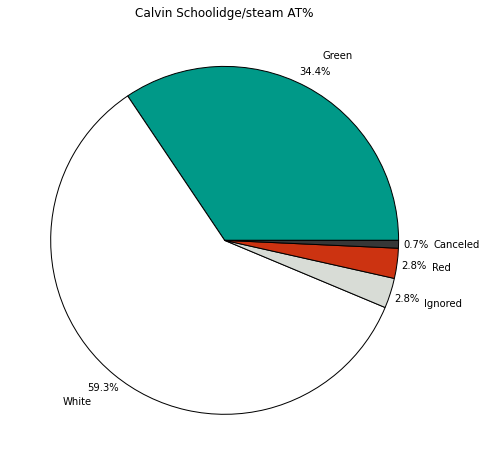

In [7]:
_=action_test_percentages(
    opp_spy_replays,
    axis_properties = AxisProperties(title=f"{player} AT%")
)

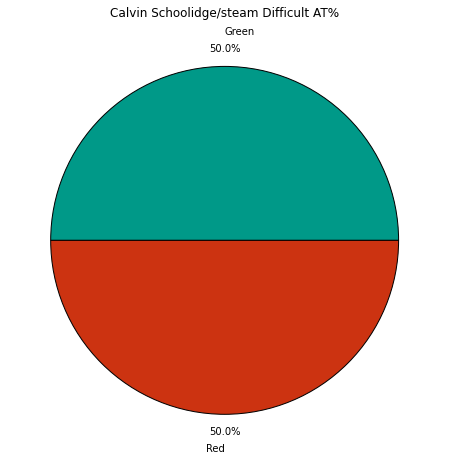

In [8]:
_=diff_action_test_percentages(
    opp_spy_replays,
    axis_properties = AxisProperties(title=f"{player} Difficult AT%")
)

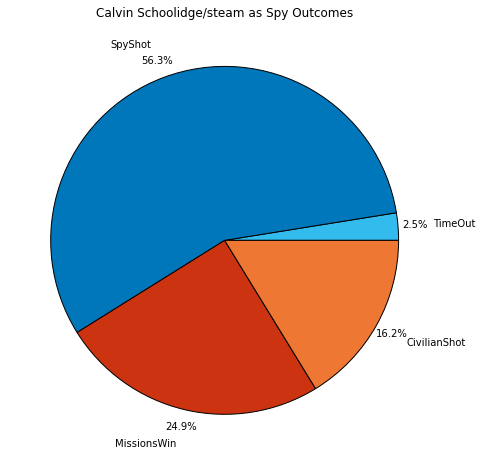

In [9]:
_=game_outcomes(
    opp_spy_replays,
    axis_properties=AxisProperties(title=f"{player} as Spy Outcomes")
)

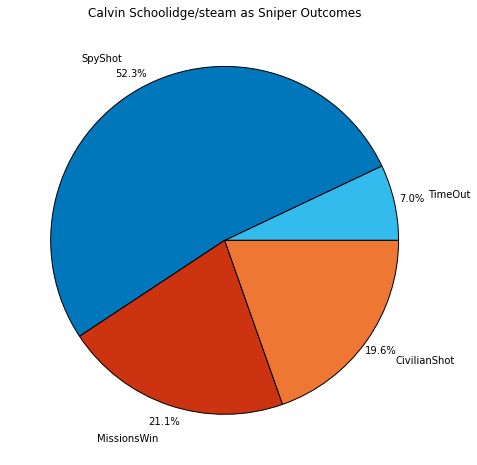

In [10]:
_=game_outcomes(
    opp_sniper_replays,
    axis_properties=AxisProperties(title=f"{player} as Sniper Outcomes")
)

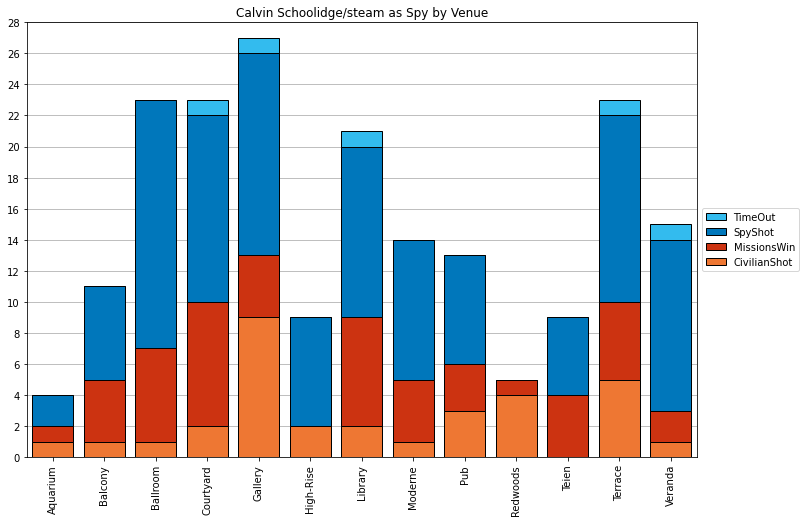

In [11]:
_=game_outcomes(
    opp_spy_replays,
    DataQueryProperties(groupby=lambda g: g.venue),
    axis_properties=AxisProperties(title=f"{player} as Spy by Venue")
)

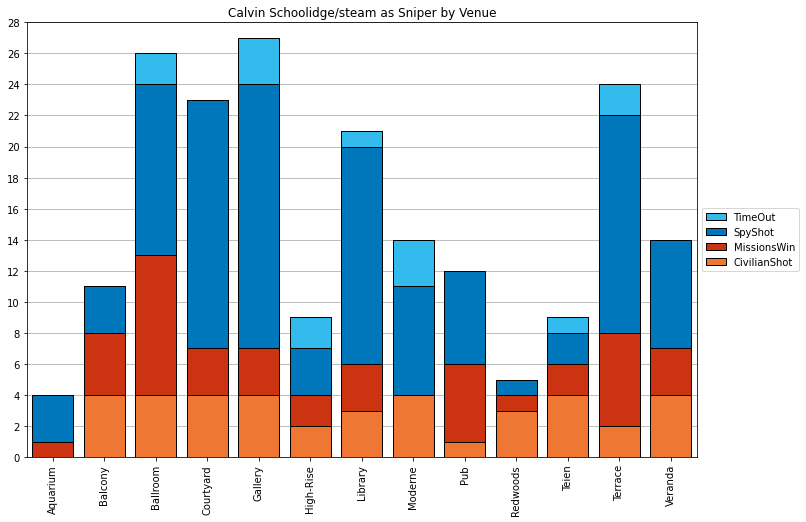

In [12]:
_=game_outcomes(
    opp_sniper_replays,
    DataQueryProperties(groupby=lambda g: g.venue),
    axis_properties=AxisProperties(title=f"{player} as Sniper by Venue")
)

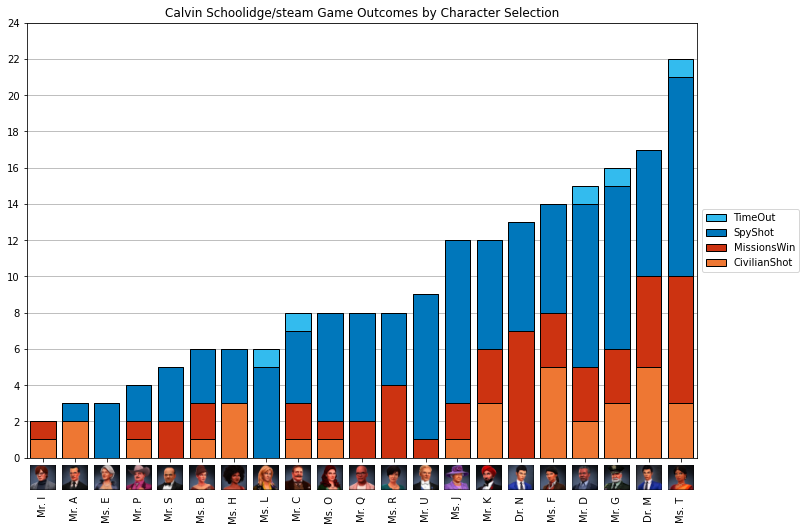

In [13]:
_=game_outcomes(
    opp_spy_replays,
    DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sum,
    ),
    axis_properties=AxisProperties(title=f"{player} Game Outcomes by Character Selection",x_axis_portrait=True)
)

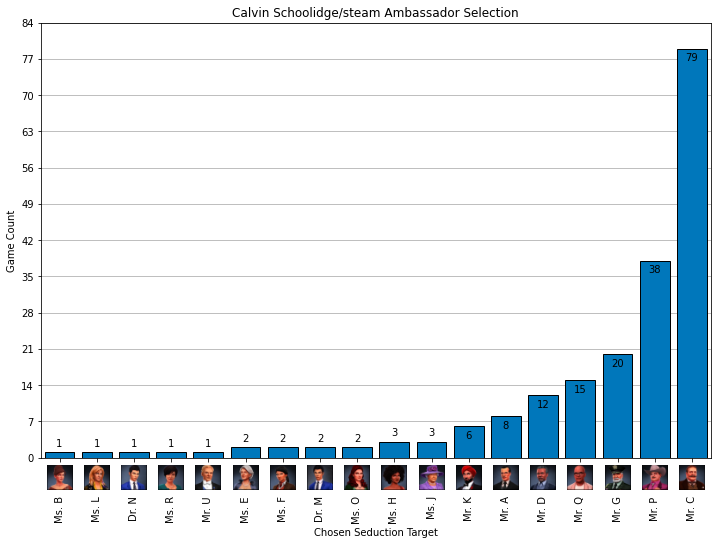

In [14]:
_=amba_selection(
    opp_spy_replays,
    axis_properties = AxisProperties(
        title=f"{player} Ambassador Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Seduction Target",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

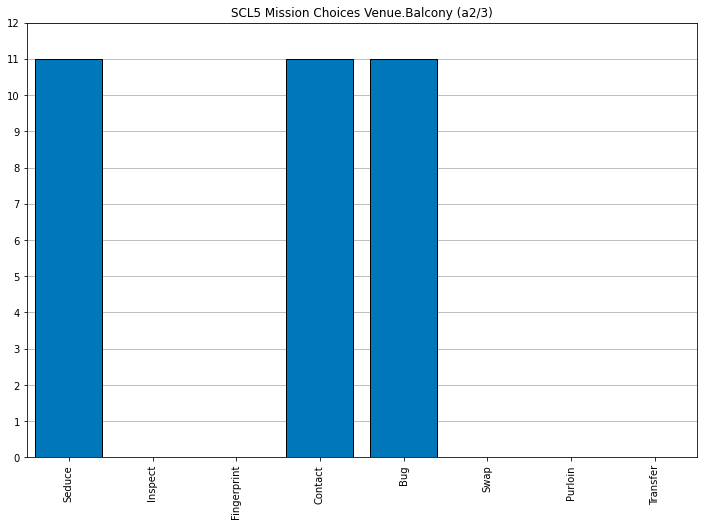

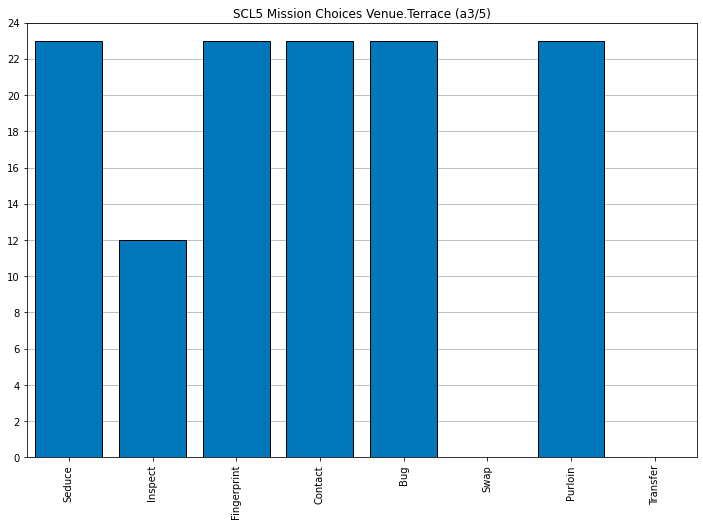

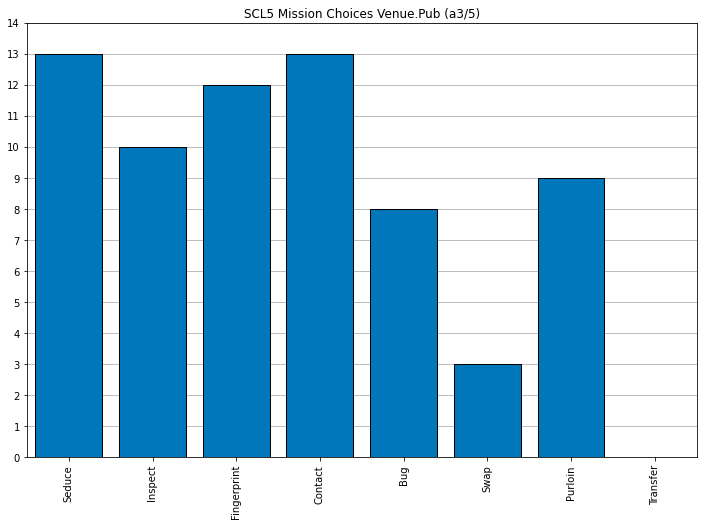

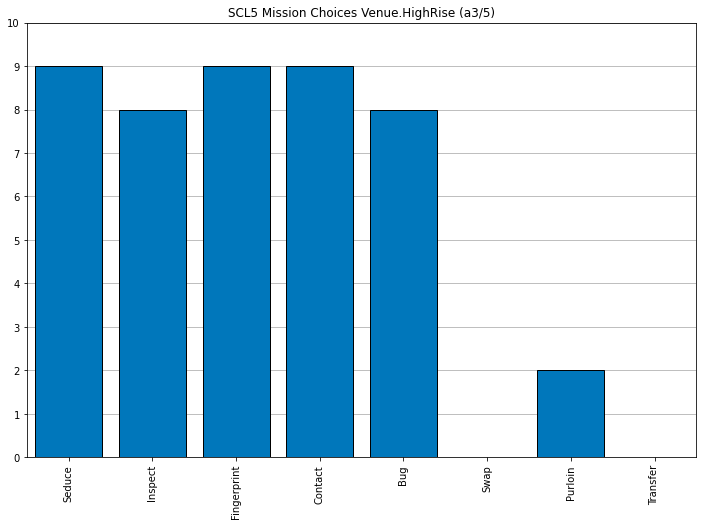

In [15]:
for venue, mode in SCL5_PICK_MODES.items():
    venue_games = filter(lambda g: g.venue==venue, opp_spy_replays)
    
    mission_choices(
        venue_games,
        axis_properties=AxisProperties(title=f"SCL5 Mission Choices {venue} ({mode})",force_bar=True)
    )

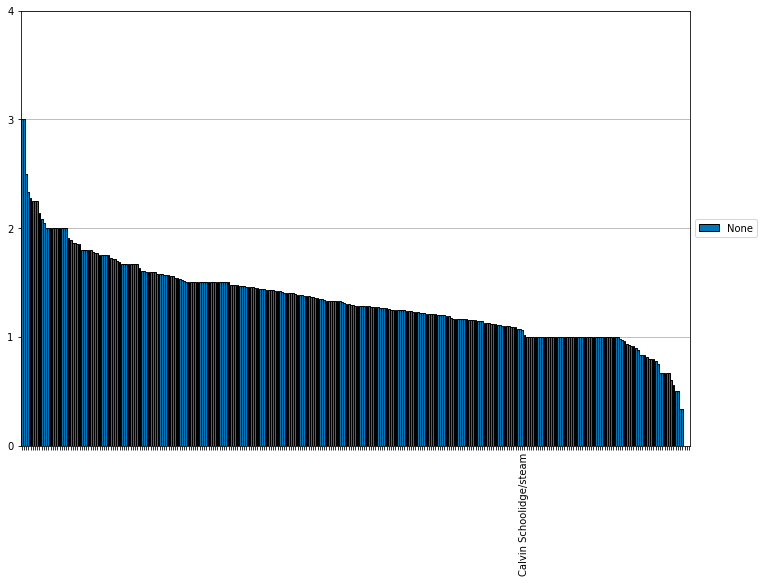

In [16]:
_=average_hard_tell_count(
    [r for r in  all_replays if r.win_type == WinType.MissionsWin],
    data_query=DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=sum,
        reverse_secondary_order=True),
    axis_properties=AxisProperties(
        secondary_label_dict = defaultdict(lambda: "", {player : player}),
    )
)

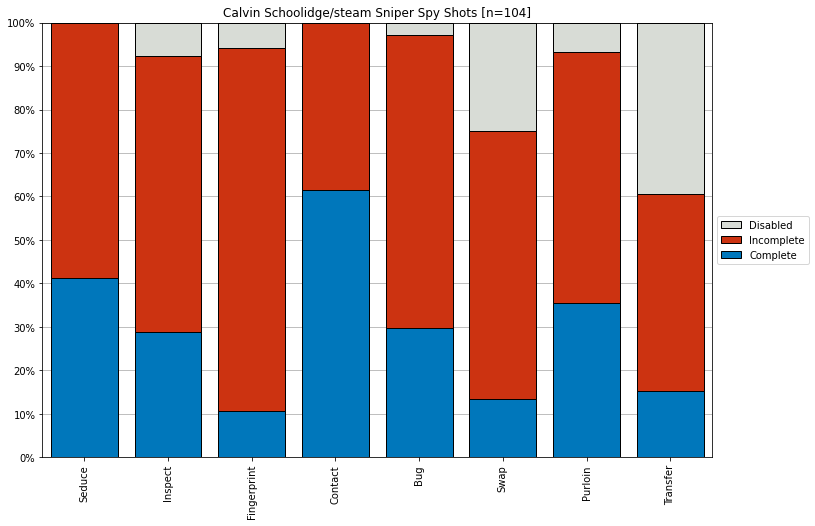

In [17]:
opp_sniper_spy_shots = [r for r in opp_sniper_replays if r.win_type == WinType.SpyShot]
mission_completion(opp_sniper_spy_shots, f"{player} Sniper Spy Shots [n={len(opp_sniper_spy_shots)}]")

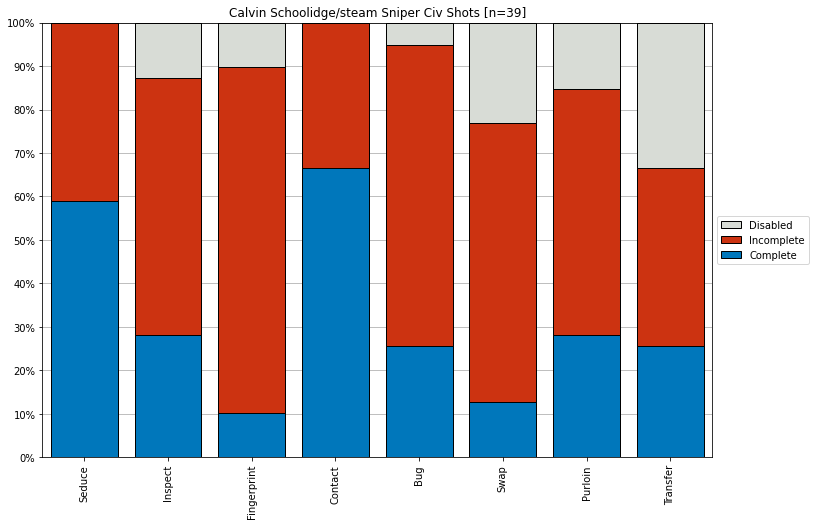

In [18]:
opp_sniper_civ_shots = [r for r in opp_sniper_replays if r.win_type == WinType.CivilianShot]
mission_completion(opp_sniper_civ_shots, f"{player} Sniper Civ Shots [n={len(opp_sniper_civ_shots)}]")

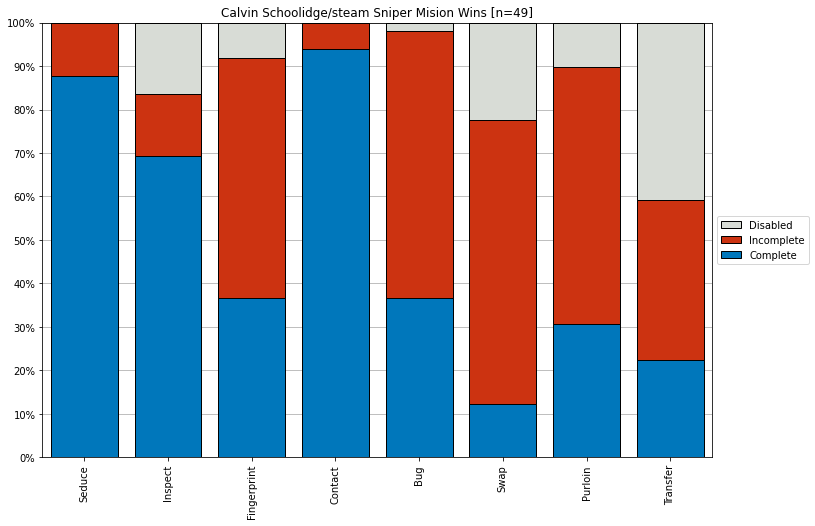

In [19]:
opp_spy_missin_wins = [r for r in opp_spy_replays if r.win_type == WinType.MissionsWin]
mission_completion(opp_spy_missin_wins, f"{player} Sniper Mision Wins [n={len(opp_spy_missin_wins)}]")

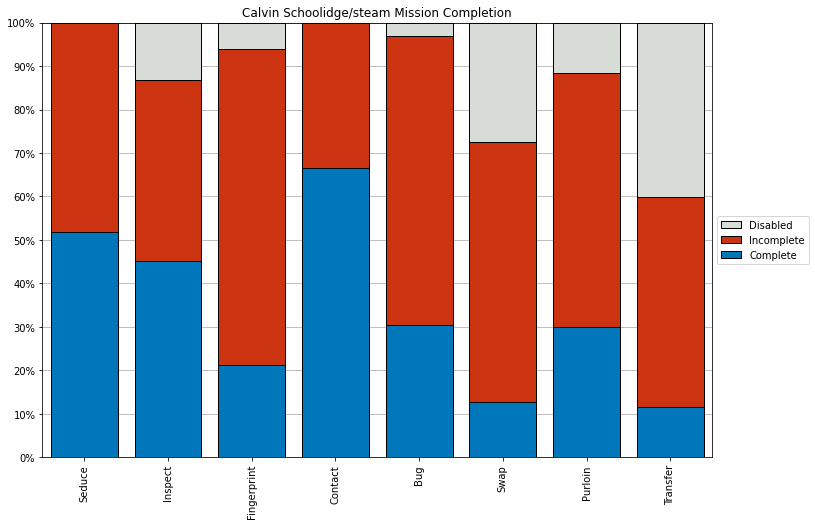

In [20]:
mission_completion(opp_spy_replays, f"{player} Mission Completion")

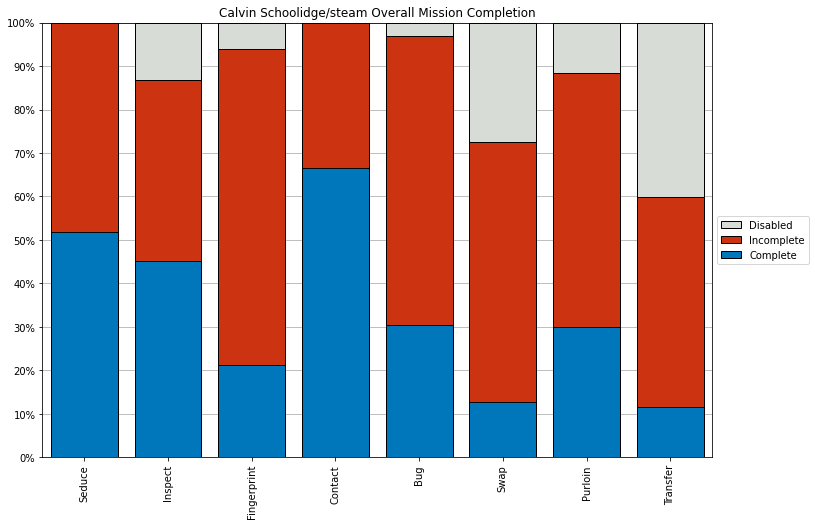

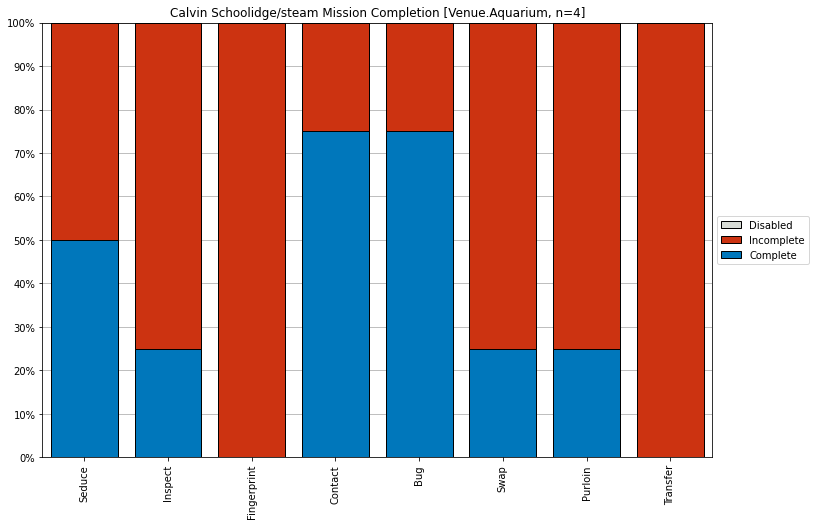

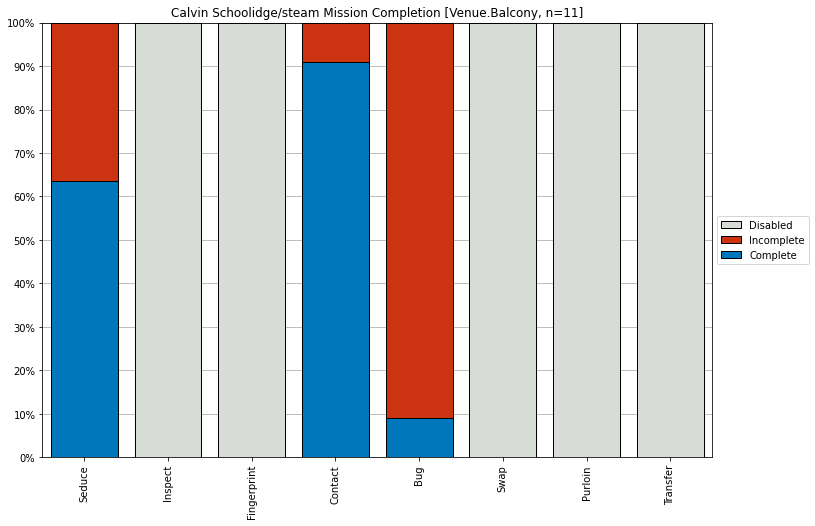

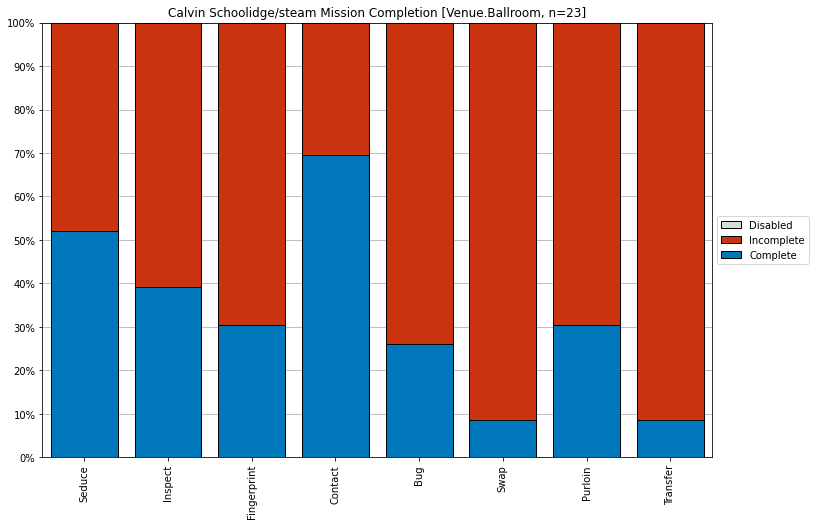

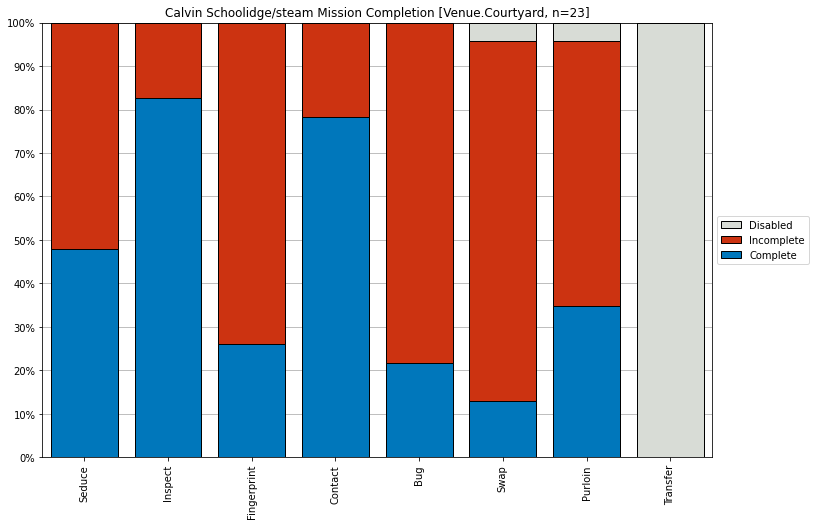

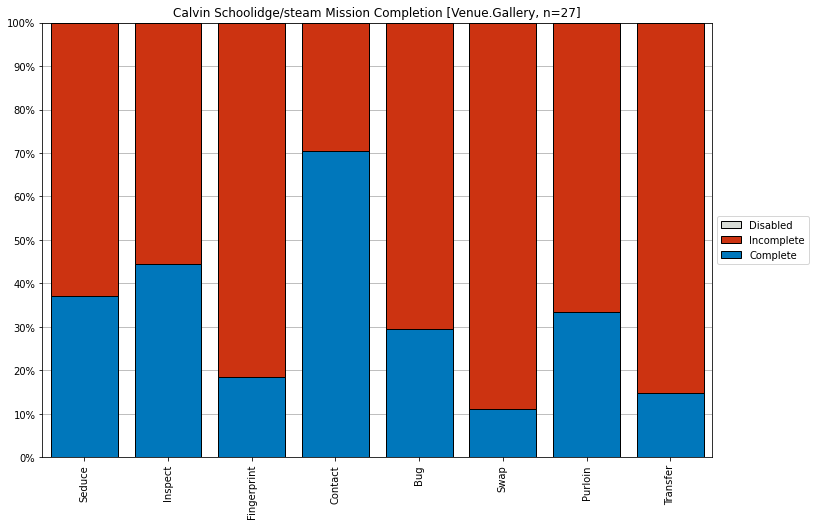

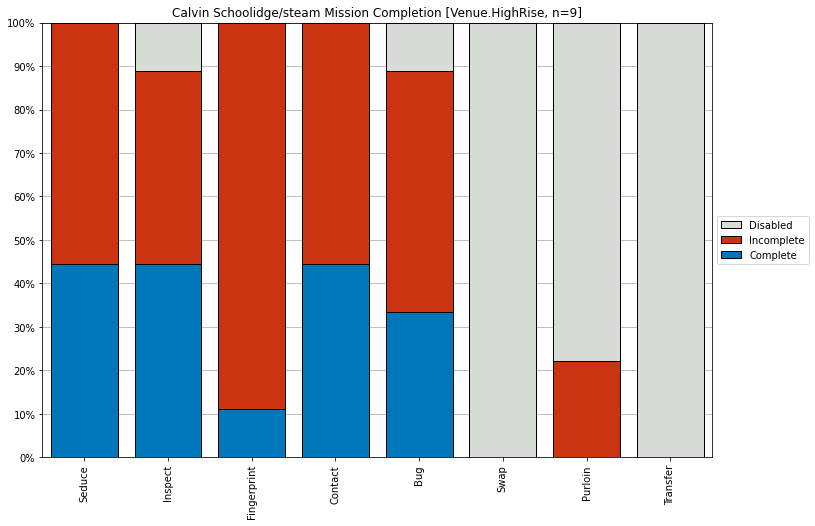

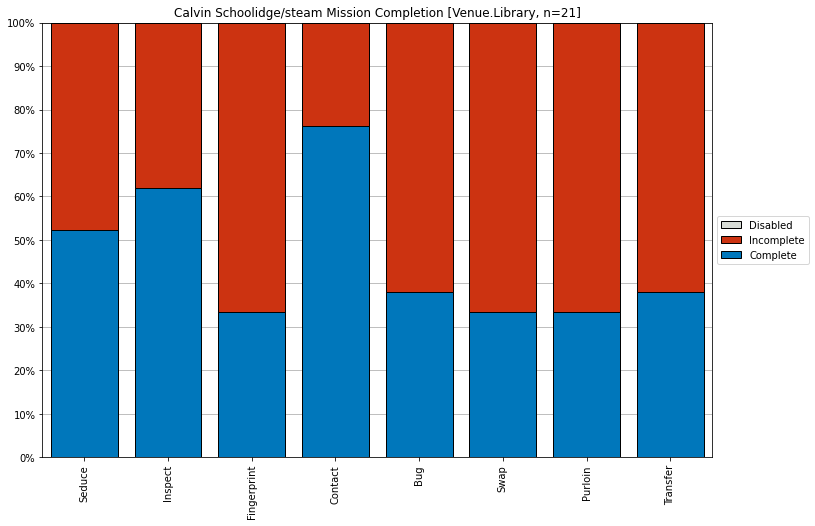

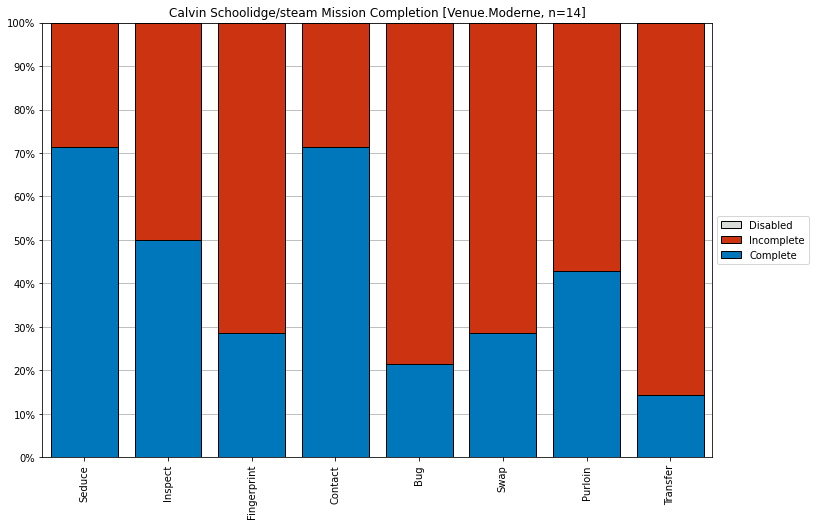

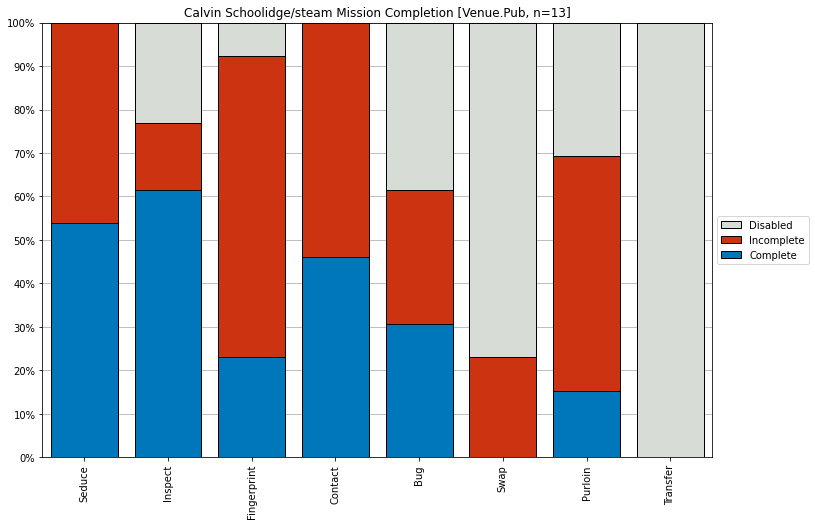

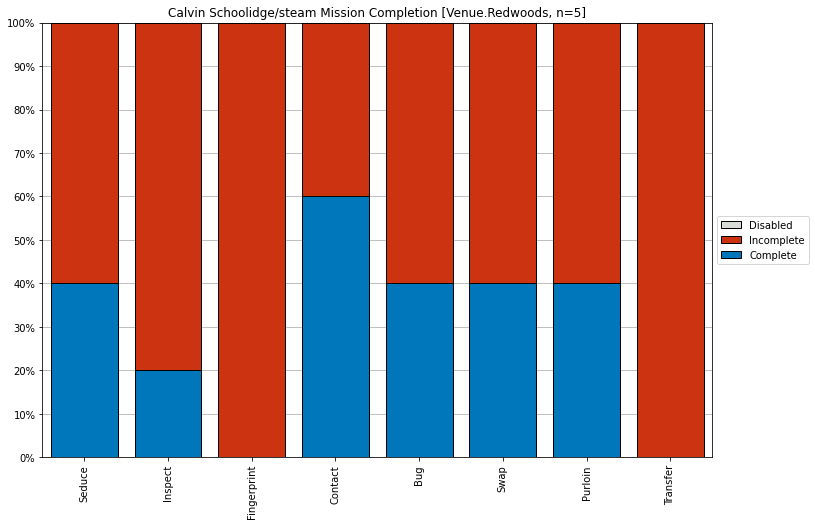

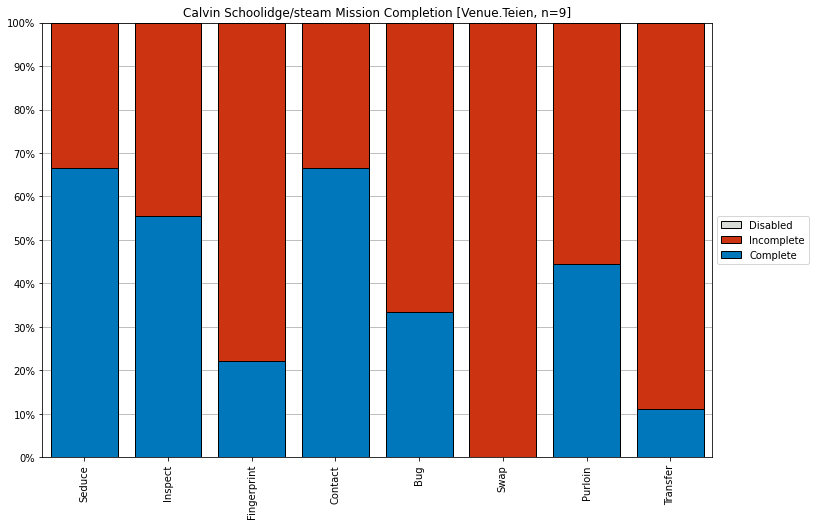

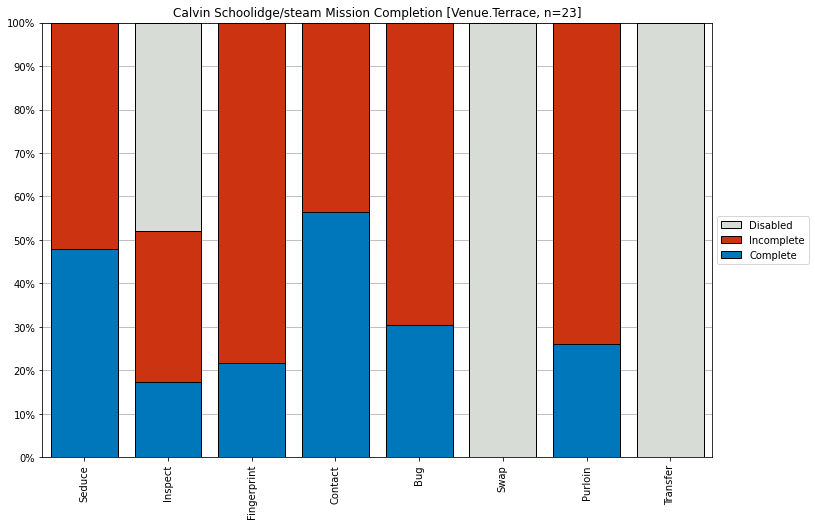

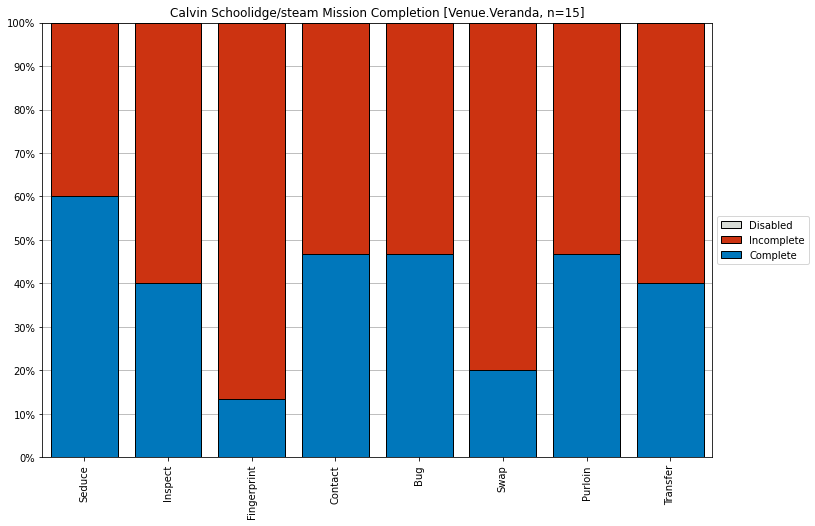

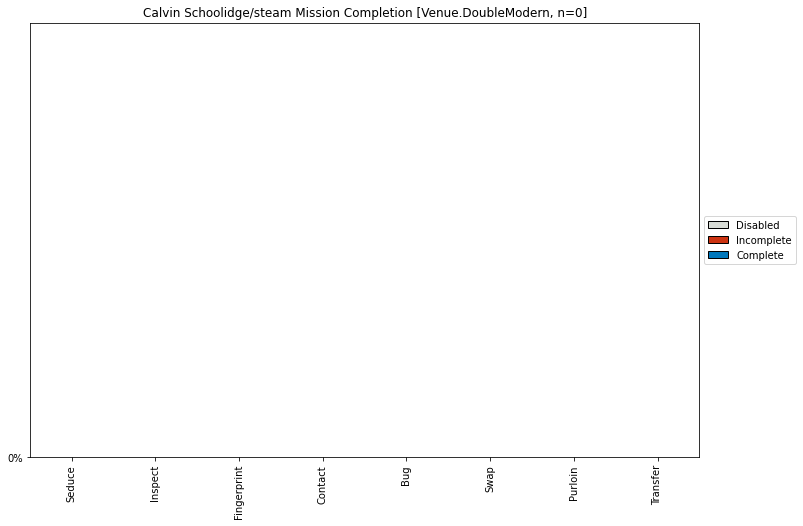

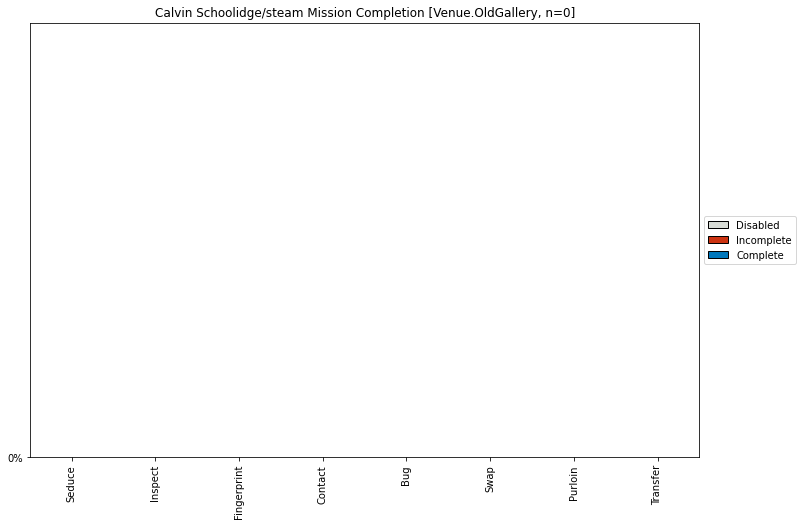

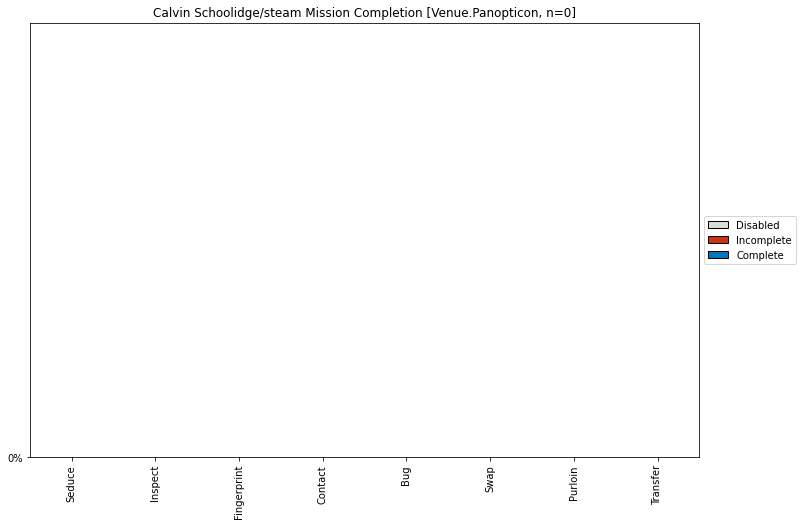

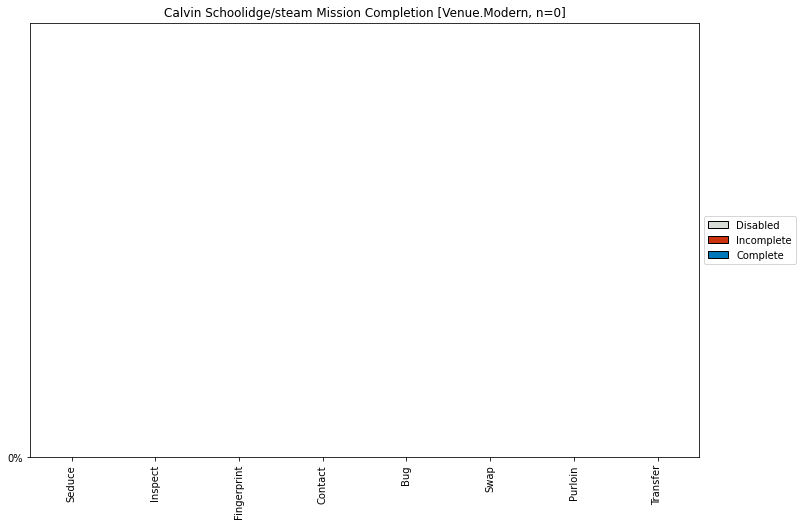

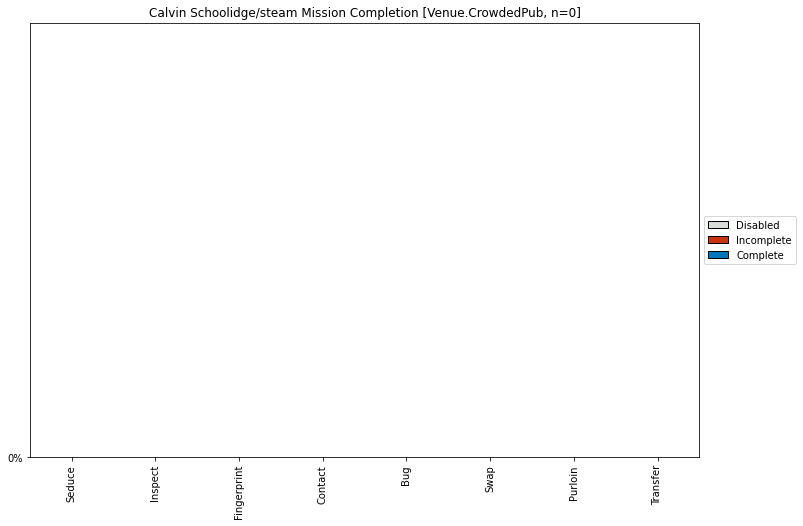

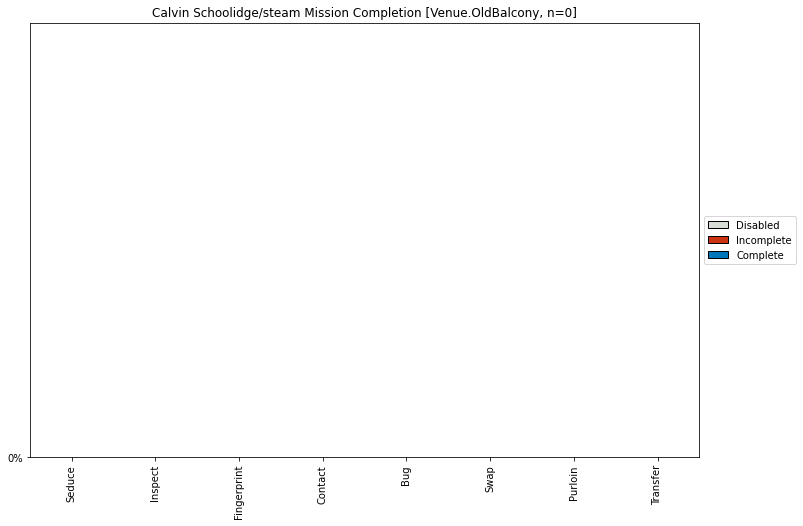

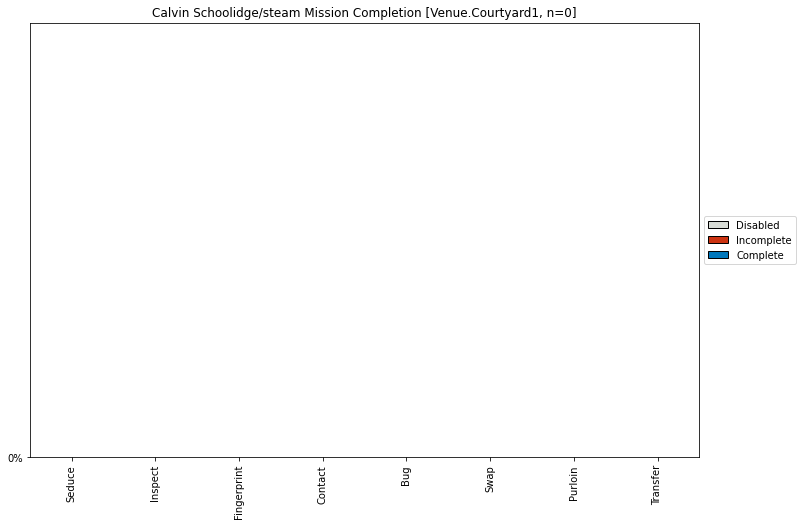

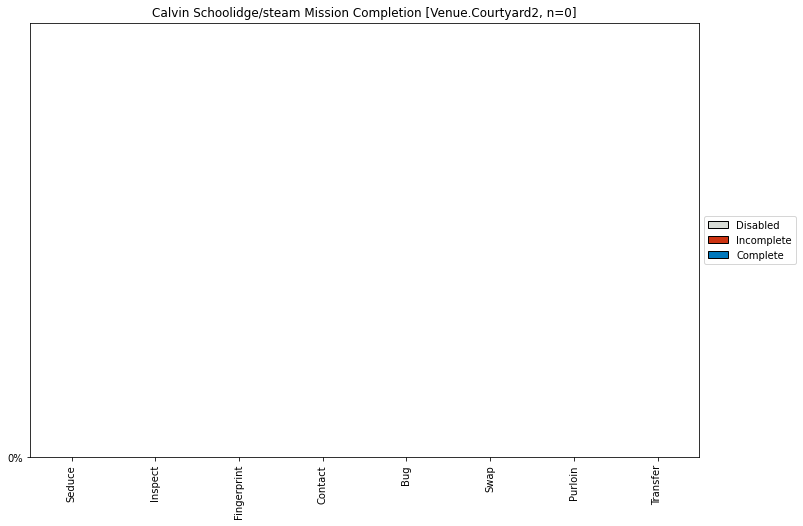

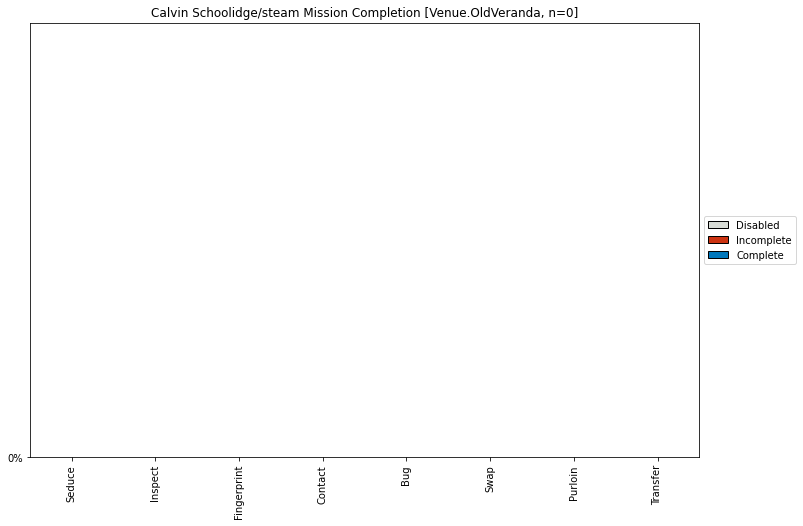

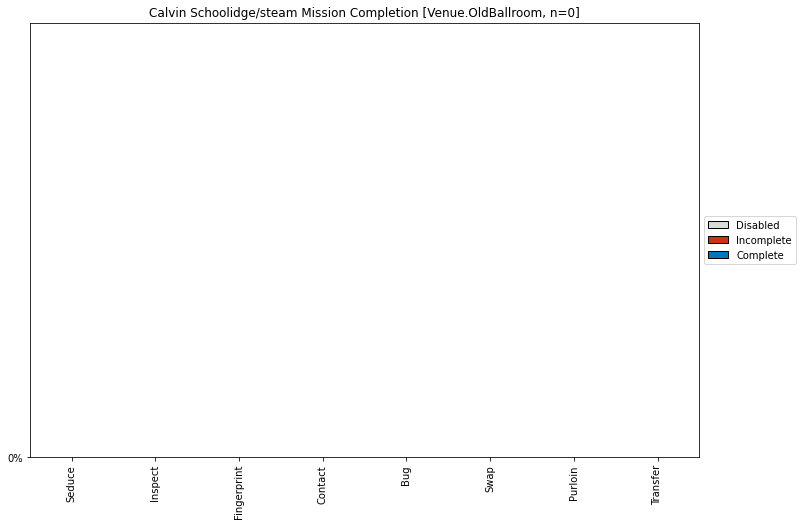

In [21]:
mission_completion(opp_spy_replays, f"{player} Overall Mission Completion")
for venue in Venue:
    venue_replays = [g for g in opp_spy_replays if g.venue == venue]
    mission_completion(venue_replays, f"{player} Mission Completion [{venue}, n={len(venue_replays)}]")

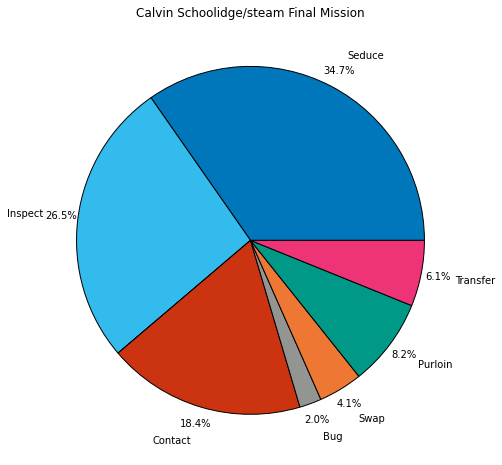

In [22]:
miss_win_replays = [g for g in opp_spy_replays if g.win_type == WinType.MissionsWin]
_=final_mission_completion_query(
    miss_win_replays,
    axis_properties=AxisProperties(title=f"{player} Final Mission")
)

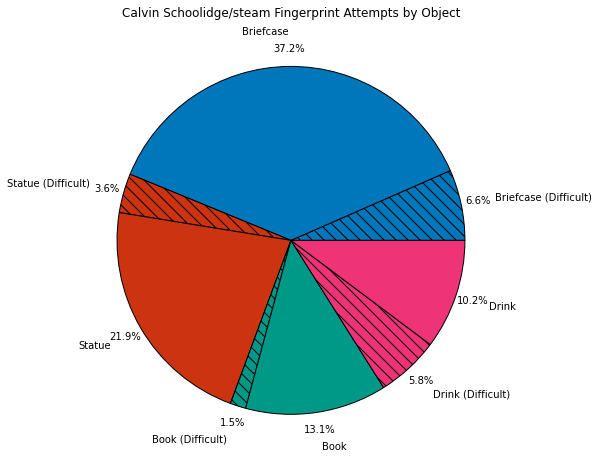

In [23]:
_=attempted_fingerprint_sources(
    opp_spy_replays, 
    axis_properties=AxisProperties(title=f"{player} Fingerprint Attempts by Object")
)

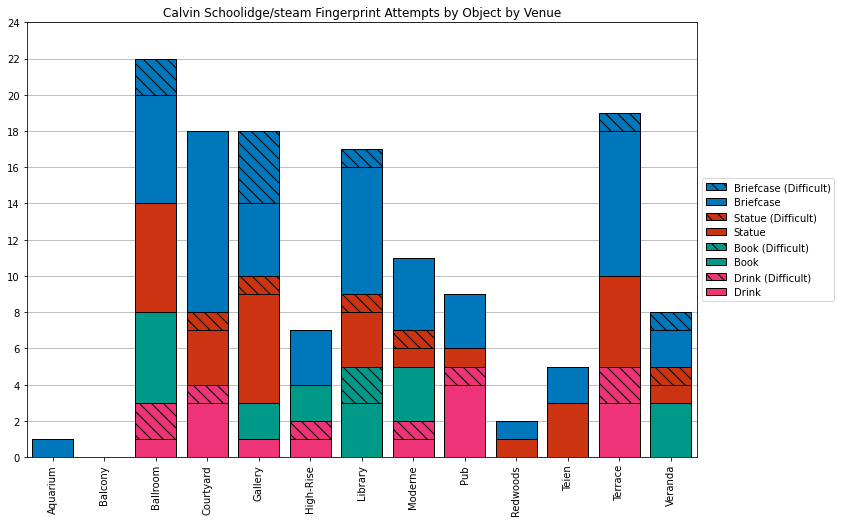

In [24]:
_=attempted_fingerprint_sources(
    opp_spy_replays, 
    data_query=DataQueryProperties(groupby=lambda g: g.venue),
    axis_properties=AxisProperties(title=f"{player} Fingerprint Attempts by Object by Venue")
)

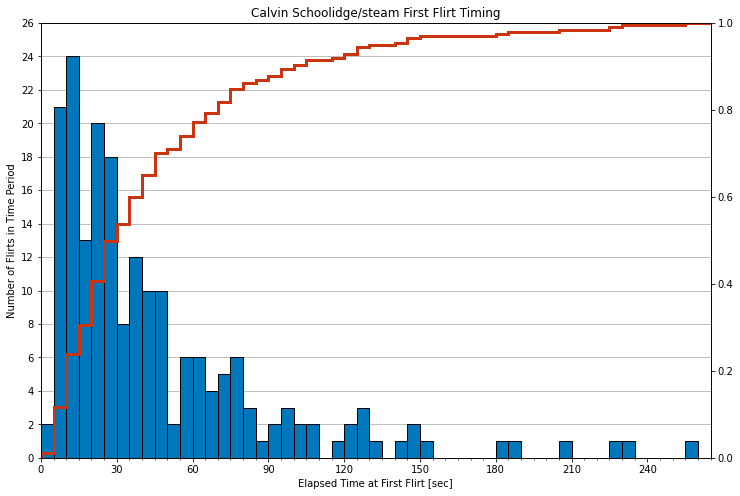

In [25]:
first_flirt_timing(opp_spy_replays, f"{player} First Flirt Timing")

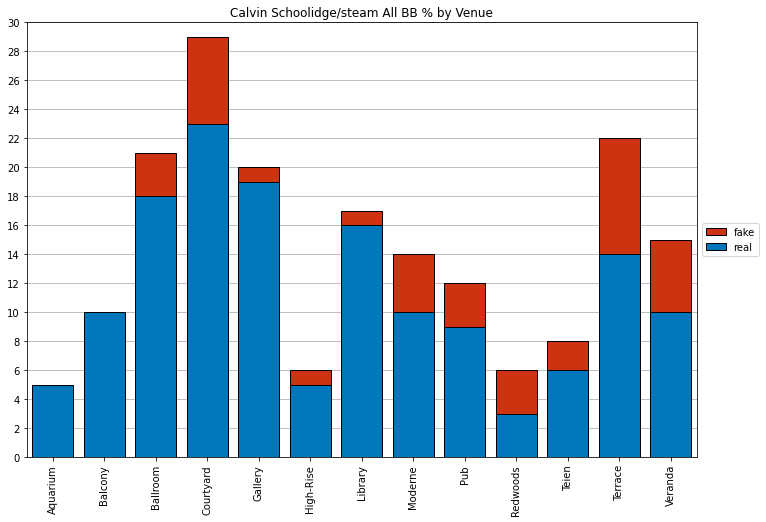

In [26]:
_=all_banana_bread_percentages(
    opp_spy_replays,
    data_query=DataQueryProperties(groupby=lambda g: g.venue),
    axis_properties=AxisProperties(title=f"{player} All BB % by Venue")
)

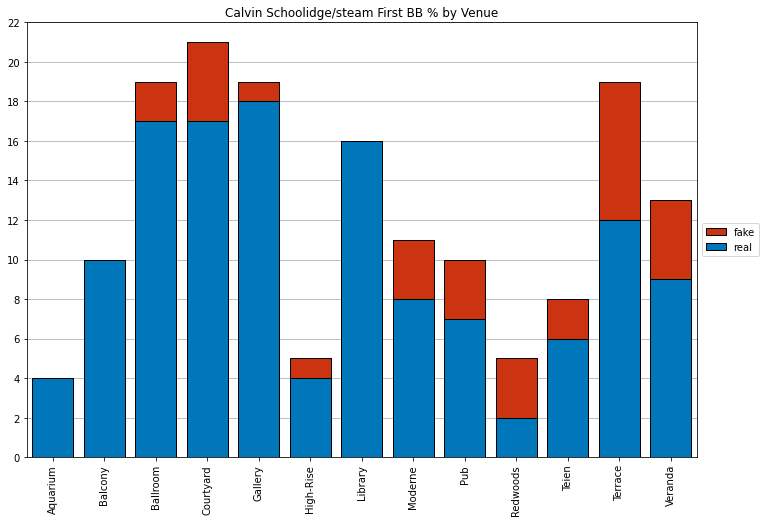

In [27]:
_=first_banana_bread_percentages(
    opp_spy_replays,
    data_query=DataQueryProperties(groupby=lambda g: g.venue),
    axis_properties=AxisProperties(title=f"{player} First BB % by Venue")
)

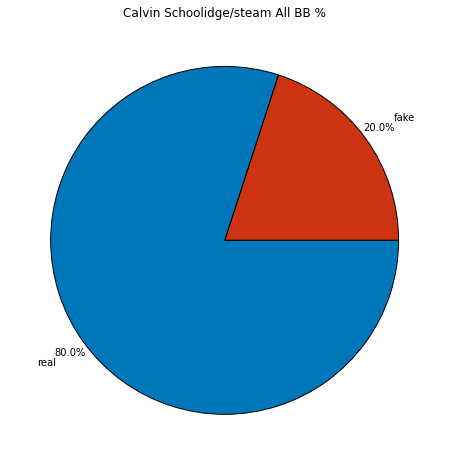

In [28]:
_=all_banana_bread_percentages(opp_spy_replays, axis_properties=AxisProperties(title=f"{player} All BB %"))

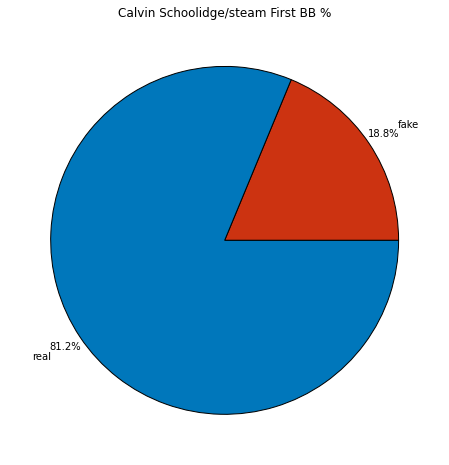

In [29]:
_=first_banana_bread_percentages(
    opp_spy_replays,
    axis_properties=AxisProperties(title=f"{player} First BB %")
)

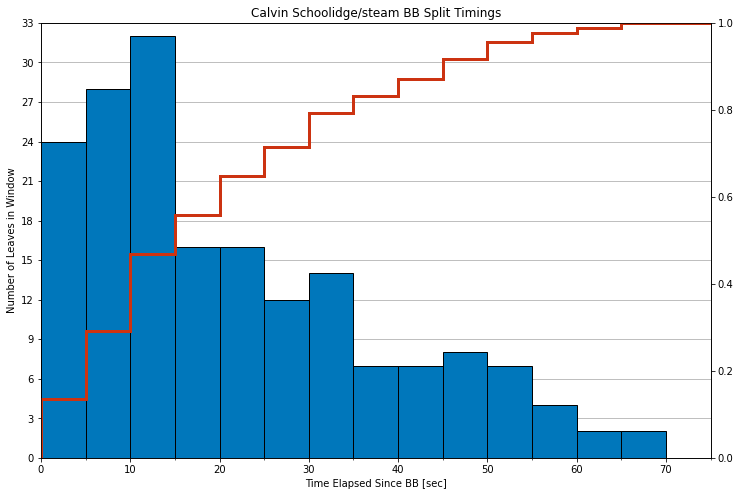

In [30]:
banana_split(opp_spy_replays, f"{player} BB Split Timings")

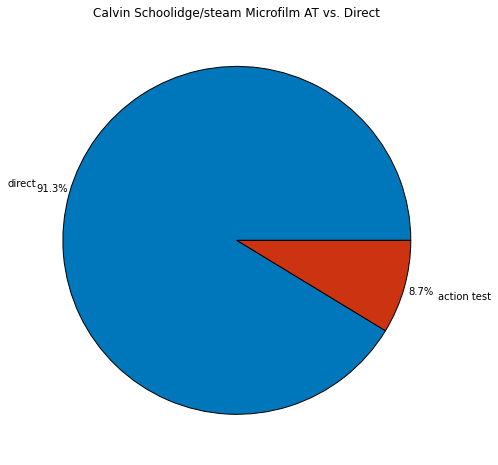

In [31]:
_=at_or_direct_mf(
    opp_spy_replays,
    axis_properties = AxisProperties(title=f"{player} Microfilm AT vs. Direct")
)

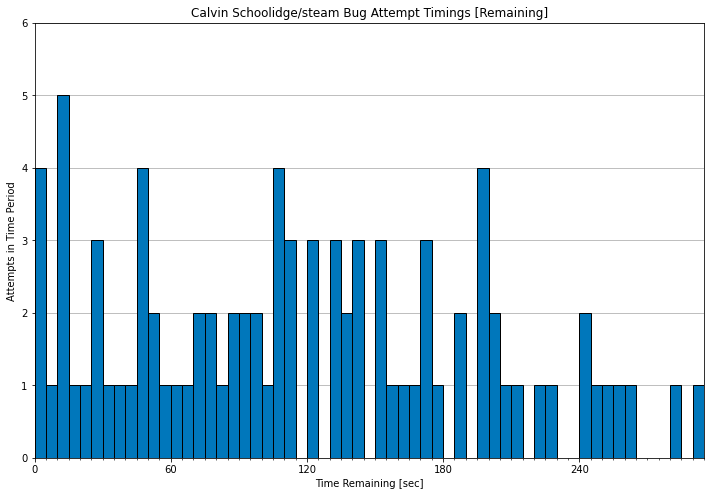

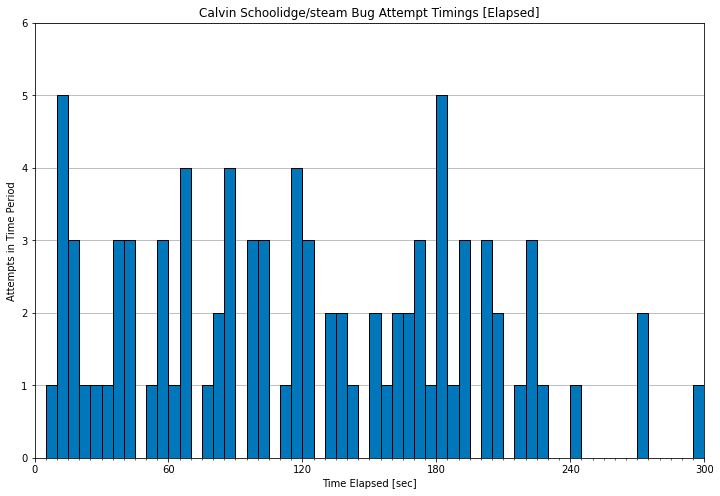

In [32]:
_=bug_attempt_timings(opp_spy_replays, f"{player} Bug Attempt Timings")

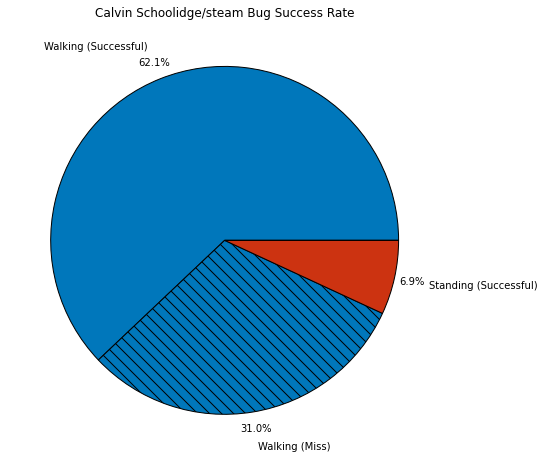

In [33]:
_=bug_success_rate(
    opp_spy_replays,
    axis_properties=AxisProperties(title=f"{player} Bug Success Rate"),
)

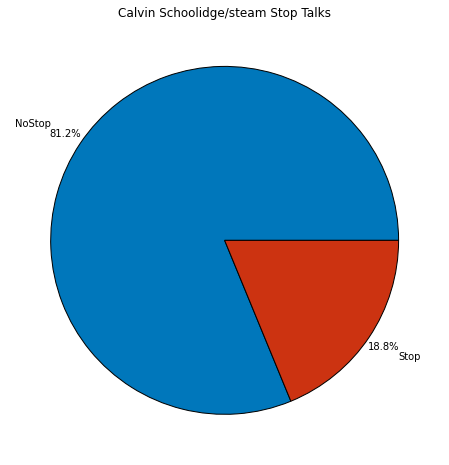

In [34]:
_=stop_talk_in_game_percentage(
    opp_spy_replays,
    axis_properties = AxisProperties(title=f"{player} Stop Talks")
)

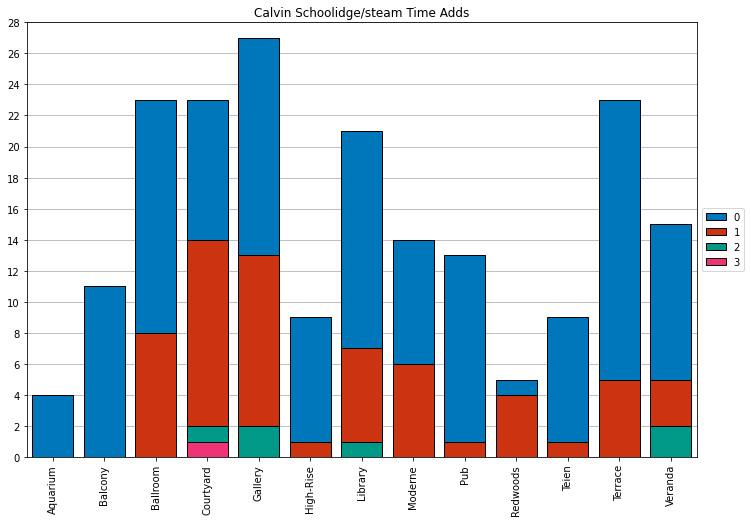

In [35]:
_=time_add_times_per_game(
    opp_spy_replays,
    axis_properties=AxisProperties(title=f"{player} Time Adds"),
    data_query=DataQueryProperties(groupby=lambda g: g.venue, reverse_primary_order=True)
)

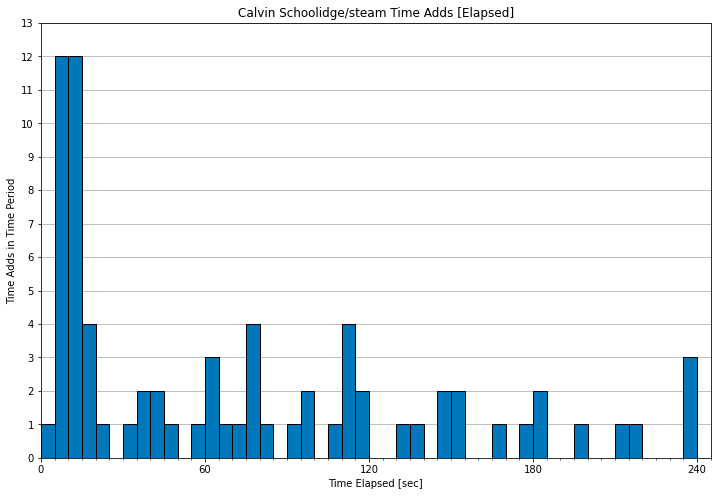

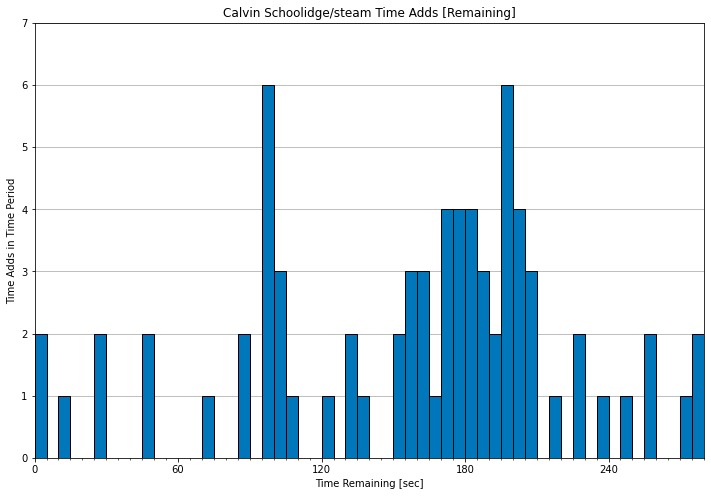

In [36]:
_=time_add_times(opp_spy_replays, f"{player} Time Adds")

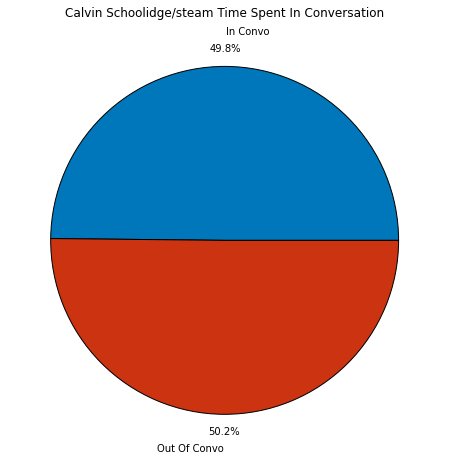

In [37]:
_=cumulative_conversation_times(
    opp_spy_replays,
    axis_properties=AxisProperties(title=f"{player} Time Spent In Conversation"),
)